In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 65.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import mne
import scipy.io as sio
import matplotlib.pyplot as plt


epochs = mne.read_epochs("/content/drive/MyDrive/eeg_data/ica-epo.fif")


Reading /content/drive/MyDrive/eeg_data/ica-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5996.00 ms
        0 CTF compensation matrices available
Not setting metadata
1050 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
# # implementing ICA

# from mne.preprocessing import ICA

# # Define ICA parameters
# n_components = 3 # Number of ICA components to compute
# method = 'fastica'  # The ICA method to use ('fastica' is common)

# # Initialize the ICA object
# ica = ICA(n_components=n_components, method=method, random_state=97)
# # Fit the ICA model to the epochs data
# ica.fit(epochs)


In [ ]:
# Apply the ICA solution to the epochs data
# ica.apply(epochs)
epochs = epochs.pick(['O1','Oz','O2'])
labels = epochs.events[:, -1]


In [ ]:
!git clone https://github.com/vlawhern/arl-eegmodels.git


Cloning into 'arl-eegmodels'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 112 (delta 1), reused 4 (delta 1), pack-reused 106 (from 1)
Receiving objects: 100% (112/112), 80.61 KiB | 453.00 KiB/s, done.
Resolving deltas: 100% (48/48), done.


In [ ]:
import sys
sys.path.append('/content/arl-eegmodels')
from EEGModels import EEGNet, ShallowConvNet, DeepConvNet
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

In [ ]:
# X = epochs.get_data()*1000
# y = labels

# kernels, chans, samples = 1, 3, 1500

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# X_train.shape,X_val.shape,X_test.shape


In [ ]:

# y_train = to_categorical(y_train-1)
# y_val   = to_categorical(y_val-1)
# y_test  = to_categorical(y_test-1)


# X_train = X_train[:, :, :, np.newaxis]
# X_val   = X_val[:, :, :, np.newaxis]
# X_test  = X_test[:, :, :, np.newaxis]

## EEGNet Training and Validation


Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50

Epoch 1: val_loss improved from inf to 1.60903, saving model to /tmp/eegnet_checkpoints/fold_1_best_weights.keras
53/53 - 14s - 257ms/step - accuracy: 0.3167 - loss: 1.5825 - val_accuracy: 0.2095 - val_loss: 1.6090
Epoch 2/50

Epoch 2: val_loss improved from 1.60903 to 1.60763, saving model to /tmp/eegnet_checkpoints/fold_1_best_weights.keras
53/53 - 10s - 196ms/step - accuracy: 0.5595 - loss: 1.4646 - val_accuracy: 0.3667 - val_loss: 1.6076
Epoch 3/50

Epoch 3: val_loss improved from 1.60763 to 1.60534, saving model to /tmp/eegnet_checkpoints/fold_1_best_weights.keras
53/53 - 1s - 10ms/step - accuracy: 0.6345 - loss: 1.3730 - val_accuracy: 0.3905 - val_loss: 1.6053
Epoch 4/50

Epoch 4: val_loss improved from 1.60534 to 1.60135, saving model to /tmp/eegnet_checkpoints/fold_1_best_weights.keras
53/53 - 0s - 8ms/step - accuracy: 0.6845 - loss: 1.3222 - val_accuracy: 0.2714 - val_loss: 1.6014
Epoch 5/50

Epoch 5: val_loss improved from 1.60135 to 1.59483, saving model to /tmp/

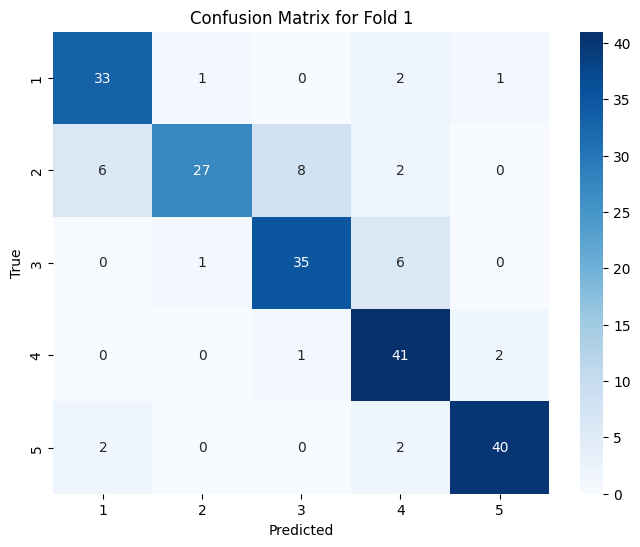

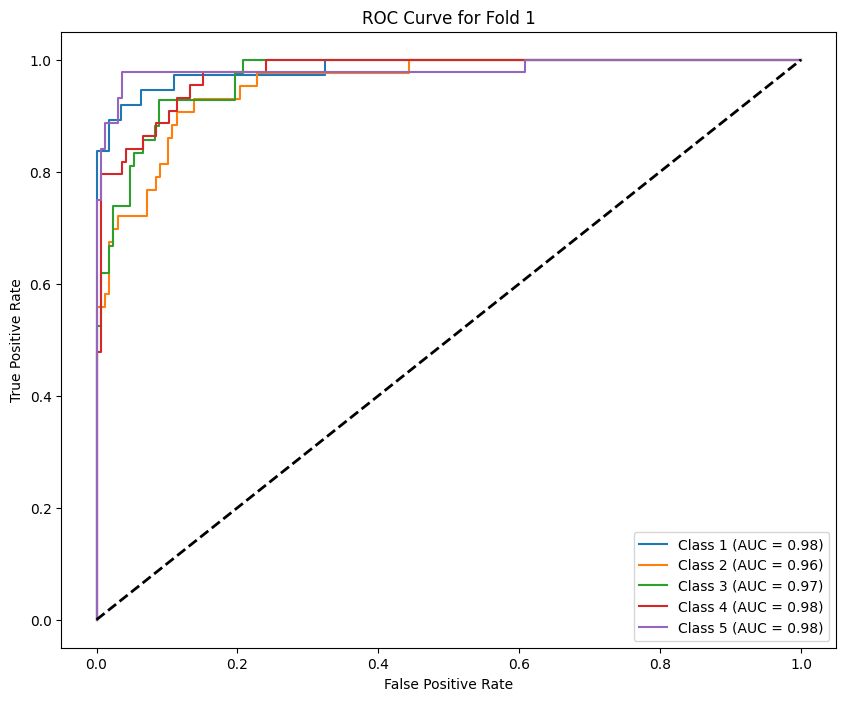

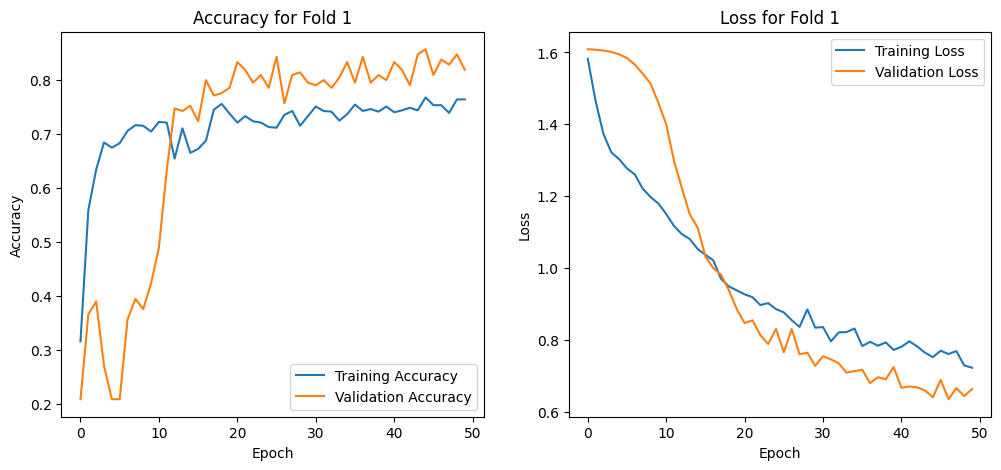

Training fold 2...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.60963, saving model to /tmp/eegnet_checkpoints/fold_2_best_weights.keras
53/53 - 8s - 159ms/step - accuracy: 0.2786 - loss: 1.5885 - val_accuracy: 0.1952 - val_loss: 1.6096
Epoch 2/50

Epoch 2: val_loss improved from 1.60963 to 1.60764, saving model to /tmp/eegnet_checkpoints/fold_2_best_weights.keras
53/53 - 0s - 9ms/step - accuracy: 0.5488 - loss: 1.4517 - val_accuracy: 0.2238 - val_loss: 1.6076
Epoch 3/50

Epoch 3: val_loss improved from 1.60764 to 1.60410, saving model to /tmp/eegnet_checkpoints/fold_2_best_weights.keras
53/53 - 0s - 7ms/step - accuracy: 0.6440 - loss: 1.3621 - val_accuracy: 0.2429 - val_loss: 1.6041
Epoch 4/50

Epoch 4: val_loss improved from 1.60410 to 1.60027, saving model to /tmp/eegnet_checkpoints/fold_2_best_weights.keras
53/53 - 0s - 7ms/step - accuracy: 0.6512 - loss: 1.3187 - val_accuracy: 0.2429 - val_loss: 1.6003
Epoch 5/50

Epoch 5: val_loss improved from 1.60027 to 1.59451, saving model to /tmp/eegnet_checkpoin

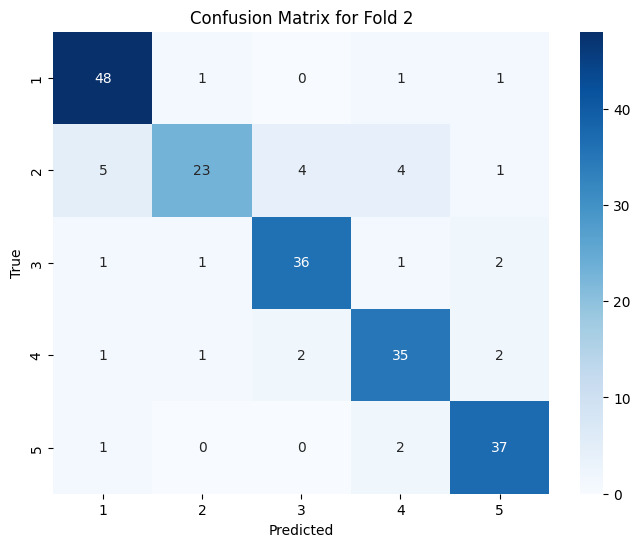

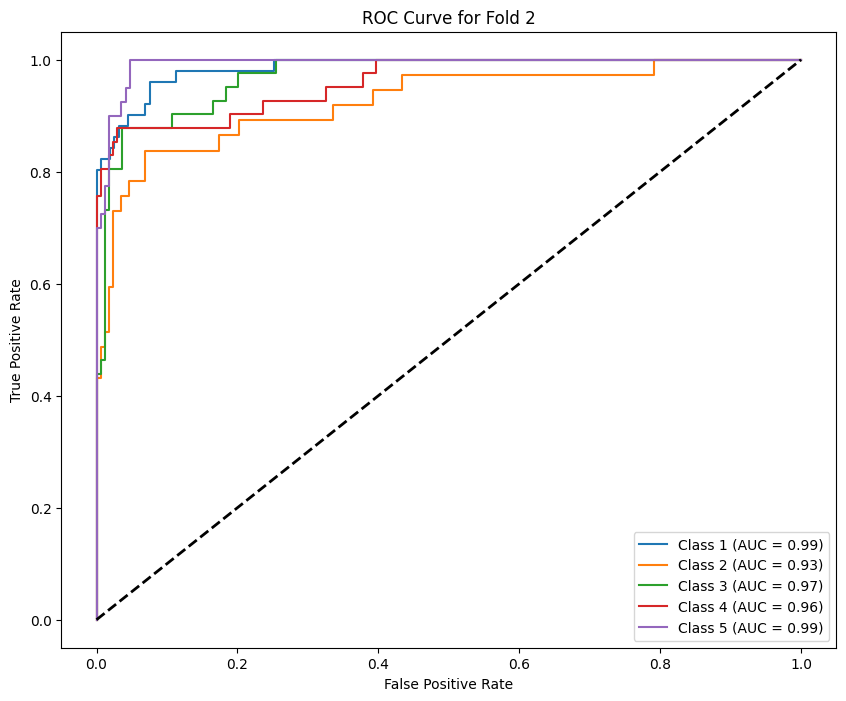

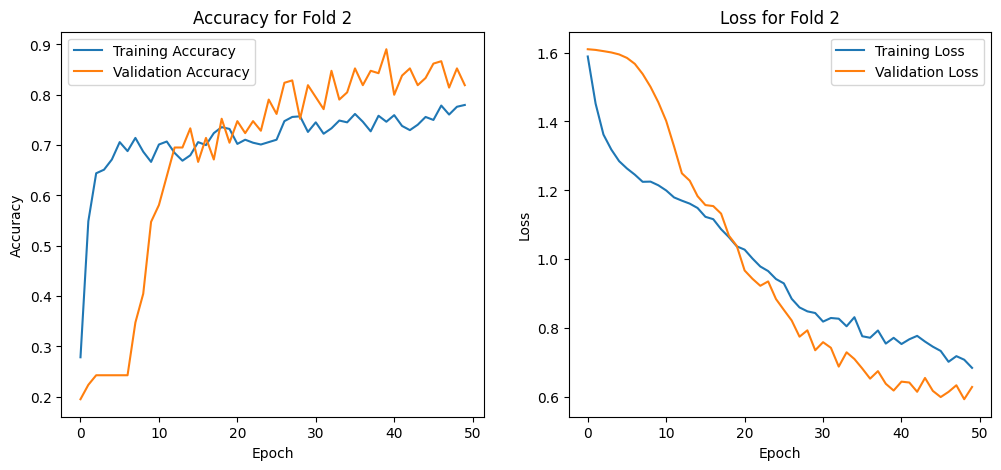

Training fold 3...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.60902, saving model to /tmp/eegnet_checkpoints/fold_3_best_weights.keras
53/53 - 7s - 132ms/step - accuracy: 0.3405 - loss: 1.5776 - val_accuracy: 0.1952 - val_loss: 1.6090
Epoch 2/50

Epoch 2: val_loss improved from 1.60902 to 1.60732, saving model to /tmp/eegnet_checkpoints/fold_3_best_weights.keras
53/53 - 5s - 101ms/step - accuracy: 0.5810 - loss: 1.4595 - val_accuracy: 0.1952 - val_loss: 1.6073
Epoch 3/50

Epoch 3: val_loss improved from 1.60732 to 1.60383, saving model to /tmp/eegnet_checkpoints/fold_3_best_weights.keras
53/53 - 0s - 7ms/step - accuracy: 0.6060 - loss: 1.3809 - val_accuracy: 0.1952 - val_loss: 1.6038
Epoch 4/50

Epoch 4: val_loss improved from 1.60383 to 1.59800, saving model to /tmp/eegnet_checkpoints/fold_3_best_weights.keras
53/53 - 0s - 6ms/step - accuracy: 0.6238 - loss: 1.3439 - val_accuracy: 0.1952 - val_loss: 1.5980
Epoch 5/50

Epoch 5: val_loss improved from 1.59800 to 1.59110, saving model to /tmp/eegnet_checkpo

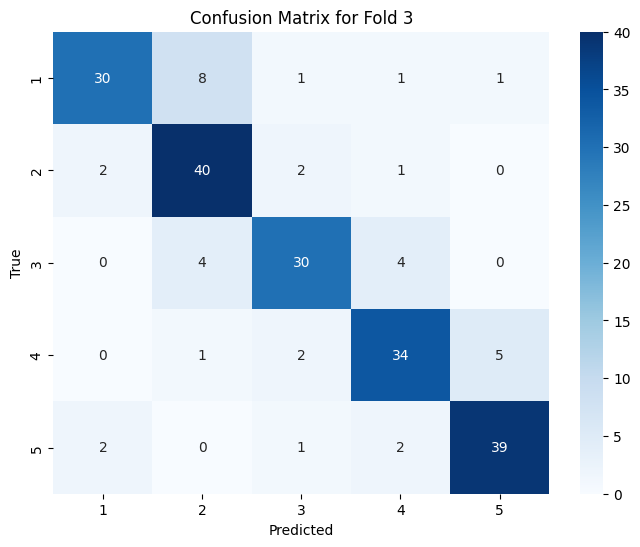

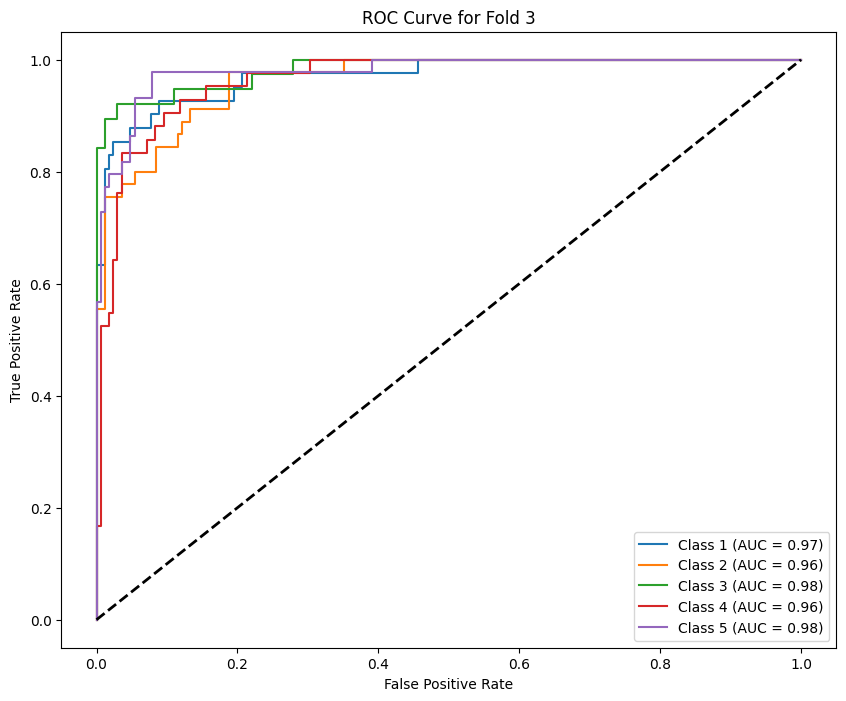

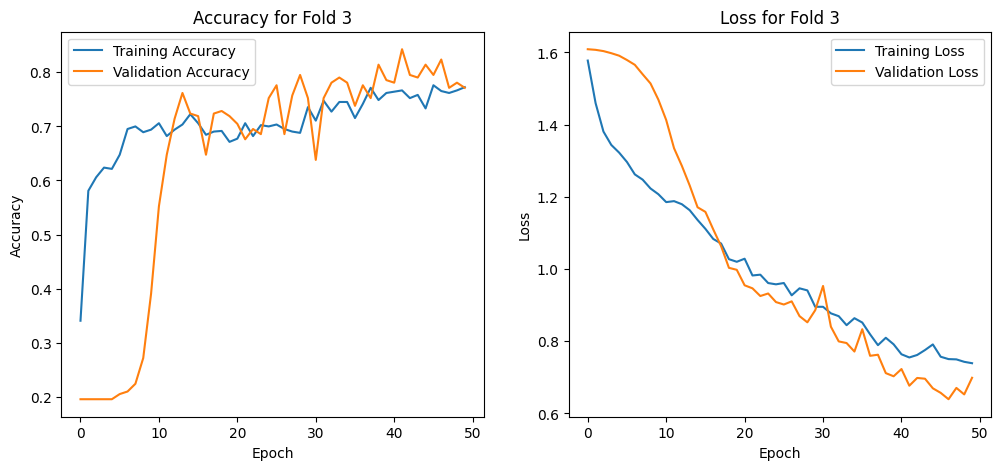

Training fold 4...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.60959, saving model to /tmp/eegnet_checkpoints/fold_4_best_weights.keras
53/53 - 8s - 147ms/step - accuracy: 0.3250 - loss: 1.5682 - val_accuracy: 0.1905 - val_loss: 1.6096
Epoch 2/50

Epoch 2: val_loss improved from 1.60959 to 1.60915, saving model to /tmp/eegnet_checkpoints/fold_4_best_weights.keras
53/53 - 0s - 8ms/step - accuracy: 0.5726 - loss: 1.4354 - val_accuracy: 0.1905 - val_loss: 1.6091
Epoch 3/50

Epoch 3: val_loss improved from 1.60915 to 1.60791, saving model to /tmp/eegnet_checkpoints/fold_4_best_weights.keras
53/53 - 1s - 10ms/step - accuracy: 0.6310 - loss: 1.3565 - val_accuracy: 0.1905 - val_loss: 1.6079
Epoch 4/50

Epoch 4: val_loss improved from 1.60791 to 1.60378, saving model to /tmp/eegnet_checkpoints/fold_4_best_weights.keras
53/53 - 1s - 11ms/step - accuracy: 0.6655 - loss: 1.3117 - val_accuracy: 0.1905 - val_loss: 1.6038
Epoch 5/50

Epoch 5: val_loss improved from 1.60378 to 1.59762, saving model to /tmp/eegnet_checkpo

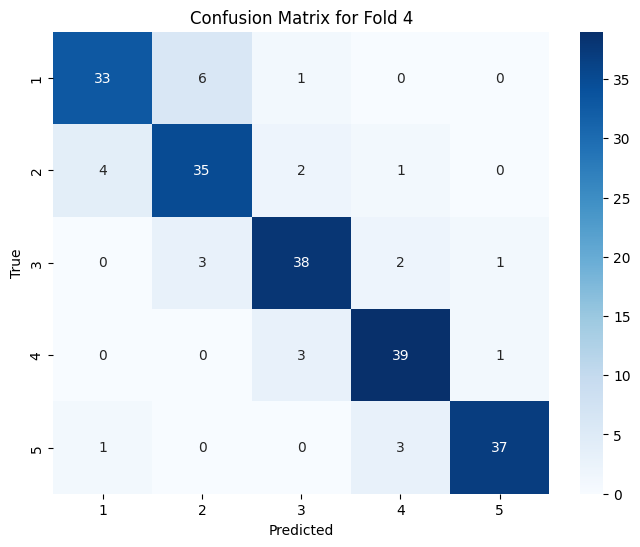

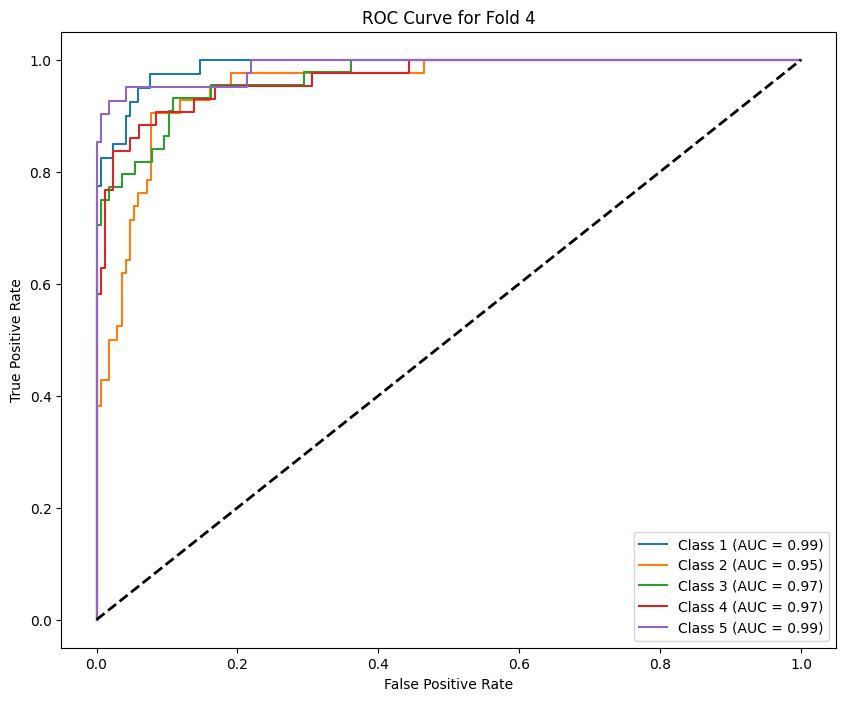

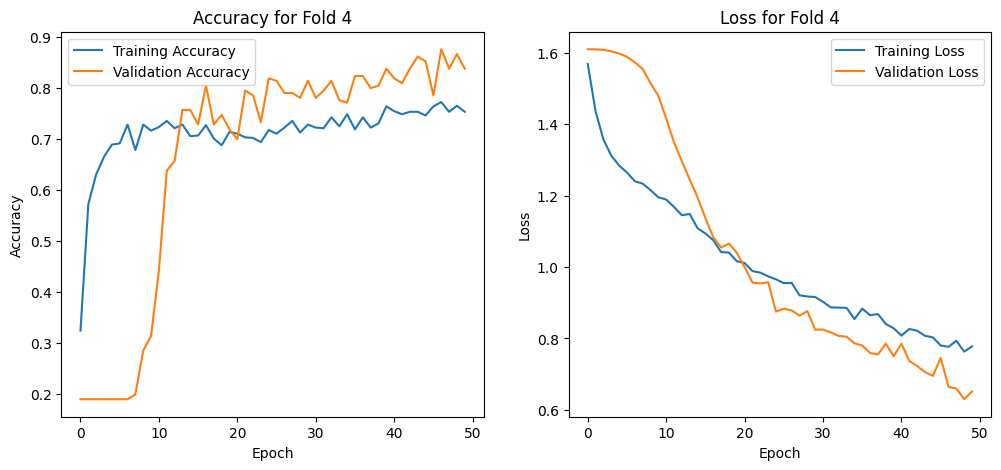

Training fold 5...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.60939, saving model to /tmp/eegnet_checkpoints/fold_5_best_weights.keras
53/53 - 8s - 147ms/step - accuracy: 0.2655 - loss: 1.5946 - val_accuracy: 0.1952 - val_loss: 1.6094
Epoch 2/50

Epoch 2: val_loss improved from 1.60939 to 1.60906, saving model to /tmp/eegnet_checkpoints/fold_5_best_weights.keras
53/53 - 5s - 87ms/step - accuracy: 0.5083 - loss: 1.5017 - val_accuracy: 0.1905 - val_loss: 1.6091
Epoch 3/50

Epoch 3: val_loss improved from 1.60906 to 1.60727, saving model to /tmp/eegnet_checkpoints/fold_5_best_weights.keras
53/53 - 0s - 7ms/step - accuracy: 0.6190 - loss: 1.4173 - val_accuracy: 0.2190 - val_loss: 1.6073
Epoch 4/50

Epoch 4: val_loss improved from 1.60727 to 1.60375, saving model to /tmp/eegnet_checkpoints/fold_5_best_weights.keras
53/53 - 0s - 6ms/step - accuracy: 0.6155 - loss: 1.3597 - val_accuracy: 0.2143 - val_loss: 1.6037
Epoch 5/50

Epoch 5: val_loss improved from 1.60375 to 1.59670, saving model to /tmp/eegnet_checkpoi

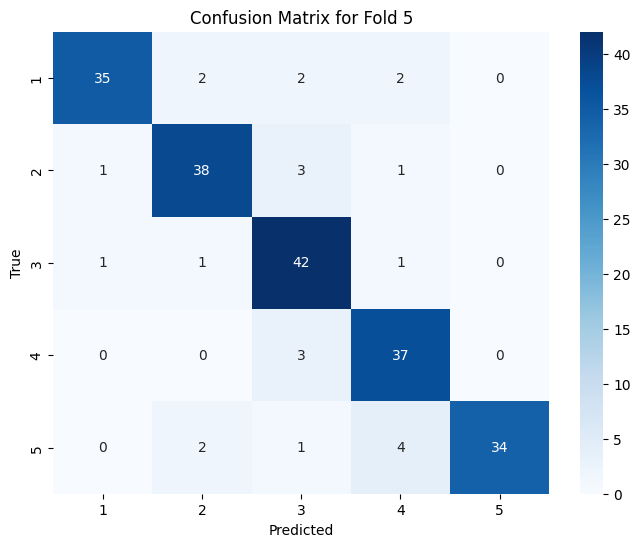

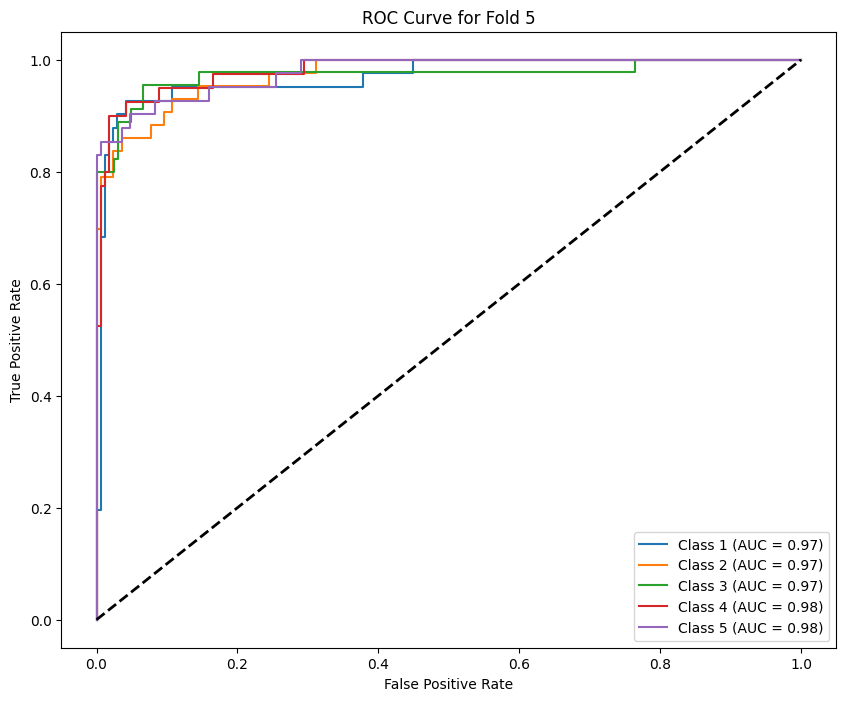

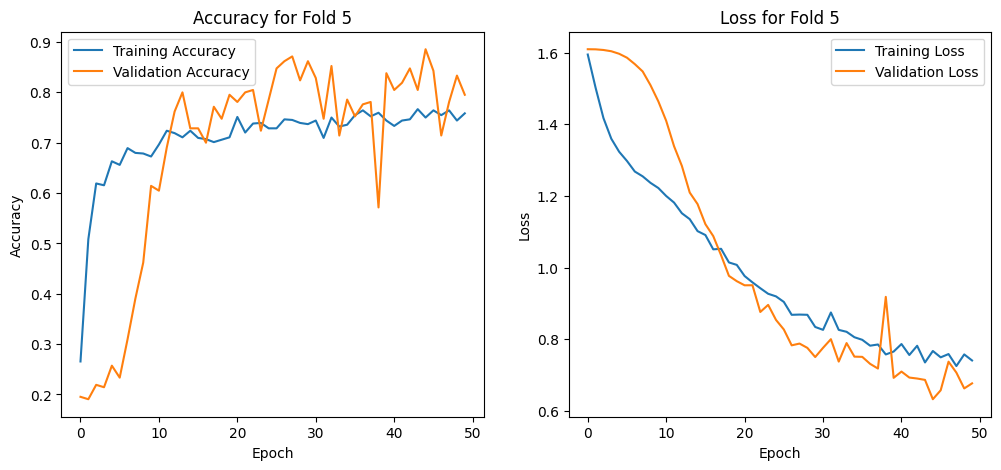

Overall Accuracy across folds: 0.8533 ± 0.0216
Overall Loss across folds: 0.6263 ± 0.0163


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Initialize data
X = epochs.get_data() * 1000  # Scale EEG data
y = labels

kernels, chans, samples = 1, 3, 1500  # Adjust to your data shape

# Convert labels to one-hot encoding
y_one_hot = to_categorical(y - 1)

# Add an extra dimension to the data (required for EEGNet)
X = X[:, :, :, np.newaxis]

# Parameters for k-fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_losses = []

# Create directory to store checkpoints
checkpoint_dir = '/tmp/eegnet_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

fold_no = 1
for train_index, val_index in kf.split(X):
    print(f"Training fold {fold_no}...")

    # Split data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_one_hot[train_index], y_one_hot[val_index]

    # Configure EEGNet model
    model = EEGNet(
        nb_classes=5,
        Chans=chans,
        Samples=samples,
        dropoutRate=0.5,
        kernLength=32,
        F1=8,
        D=2,
        F2=16,
        norm_rate=0.25,
        dropoutType='Dropout'
    )

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Add a checkpointer to save the best weights for this fold
    checkpoint_path = os.path.join(checkpoint_dir, f"fold_{fold_no}_best_weights.keras")
    checkpointer = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=16,
        epochs=50,  # Adjust for quicker evaluation; change as needed
        verbose=2,
        validation_data=(X_val, y_val),
        callbacks=[checkpointer]
    )

    # Load the best weights before evaluation
    model.load_weights(checkpoint_path)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_accuracy)
    fold_losses.append(val_loss)
    print(f"Fold {fold_no} - Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

    # Predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    # Classification Report
    print(f"Classification Report for Fold {fold_no}:\n")
    print(classification_report(y_true_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 6), yticklabels=range(1, 6))
    plt.title(f"Confusion Matrix for Fold {fold_no}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve
    y_val_bin = label_binarize(y_true_classes, classes=range(5))
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(10, 8))
    for i in range(5):
        plt.plot(fpr[i], tpr[i], label=f"Class {i+1} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.title(f"ROC Curve for Fold {fold_no}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()

    # Training-Validation Accuracy and Loss Graphs
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy for Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss for Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    fold_no += 1

# Final summary of metrics across folds
print(f"Overall Accuracy across folds: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Overall Loss across folds: {np.mean(fold_losses):.4f} ± {np.std(fold_losses):.4f}")


## DeepConvNet Training and Evaluation


Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50

Epoch 1: val_loss improved from inf to 1.88864, saving model to /tmp/deepconvnet_checkpoints/fold_1_best_weights.keras
53/53 - 20s - 381ms/step - accuracy: 0.3298 - loss: 2.0052 - val_accuracy: 0.2095 - val_loss: 1.8886
Epoch 2/50

Epoch 2: val_loss improved from 1.88864 to 0.54415, saving model to /tmp/deepconvnet_checkpoints/fold_1_best_weights.keras
53/53 - 1s - 10ms/step - accuracy: 0.7143 - loss: 0.8139 - val_accuracy: 0.8238 - val_loss: 0.5442
Epoch 3/50

Epoch 3: val_loss improved from 0.54415 to 0.52849, saving model to /tmp/deepconvnet_checkpoints/fold_1_best_weights.keras
53/53 - 1s - 11ms/step - accuracy: 0.7726 - loss: 0.6410 - val_accuracy: 0.8190 - val_loss: 0.5285
Epoch 4/50

Epoch 4: val_loss improved from 0.52849 to 0.51431, saving model to /tmp/deepconvnet_checkpoints/fold_1_best_weights.keras
53/53 - 0s - 9ms/step - accuracy: 0.8369 - loss: 0.4798 - val_accuracy: 0.8000 - val_loss: 0.5143
Epoch 5/50

Epoch 5: val_loss did not improve from 0.51431
53/53 - 

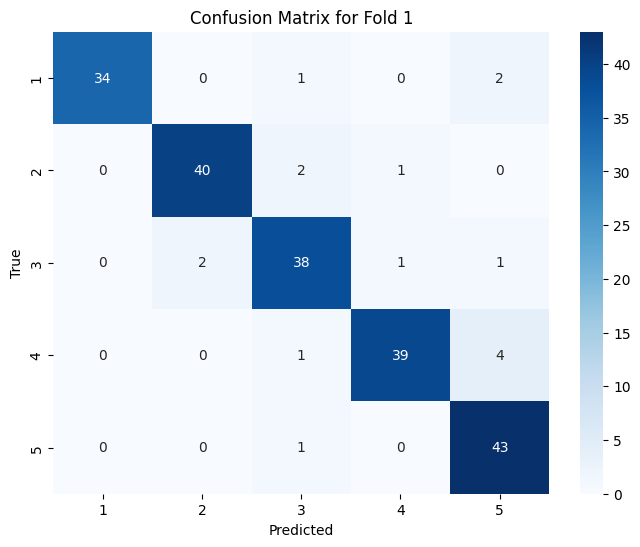

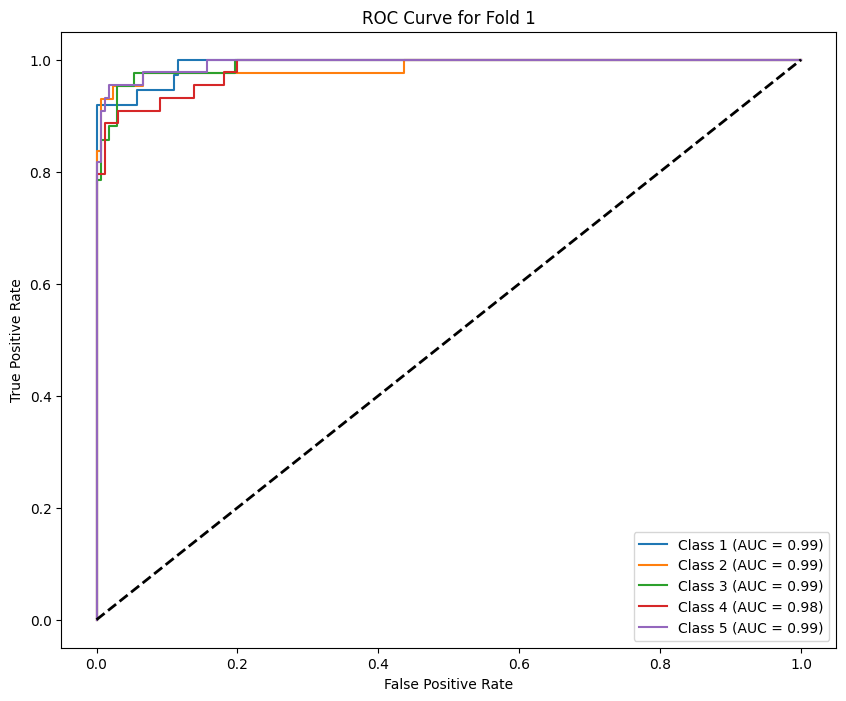

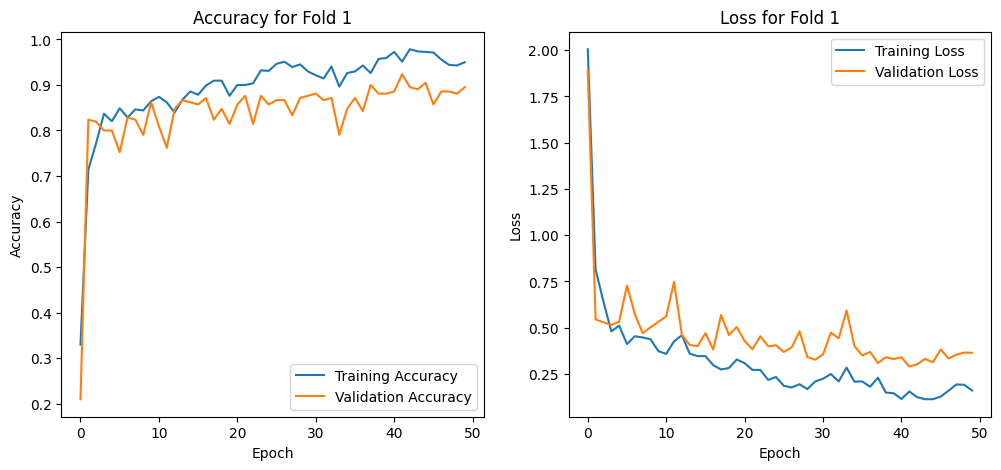

Training fold 2...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.48989, saving model to /tmp/deepconvnet_checkpoints/fold_2_best_weights.keras
53/53 - 15s - 292ms/step - accuracy: 0.2774 - loss: 2.1908 - val_accuracy: 0.4524 - val_loss: 1.4899
Epoch 2/50

Epoch 2: val_loss improved from 1.48989 to 0.45300, saving model to /tmp/deepconvnet_checkpoints/fold_2_best_weights.keras
53/53 - 8s - 157ms/step - accuracy: 0.6893 - loss: 0.8079 - val_accuracy: 0.8524 - val_loss: 0.4530
Epoch 3/50

Epoch 3: val_loss did not improve from 0.45300
53/53 - 1s - 19ms/step - accuracy: 0.8071 - loss: 0.5663 - val_accuracy: 0.7429 - val_loss: 0.6039
Epoch 4/50

Epoch 4: val_loss improved from 0.45300 to 0.43375, saving model to /tmp/deepconvnet_checkpoints/fold_2_best_weights.keras
53/53 - 1s - 14ms/step - accuracy: 0.8298 - loss: 0.4766 - val_accuracy: 0.8524 - val_loss: 0.4338
Epoch 5/50

Epoch 5: val_loss did not improve from 0.43375
53/53 - 1s - 10ms/step - accuracy: 0.8310 - loss: 0.4836 - val_accuracy: 0.8048 - val_loss: 0

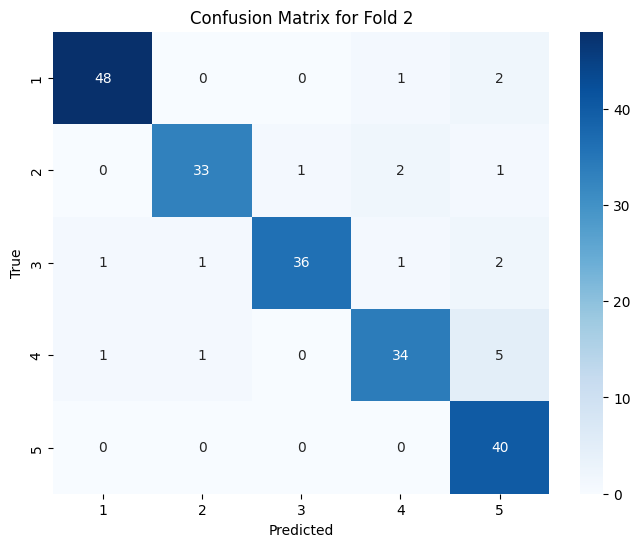

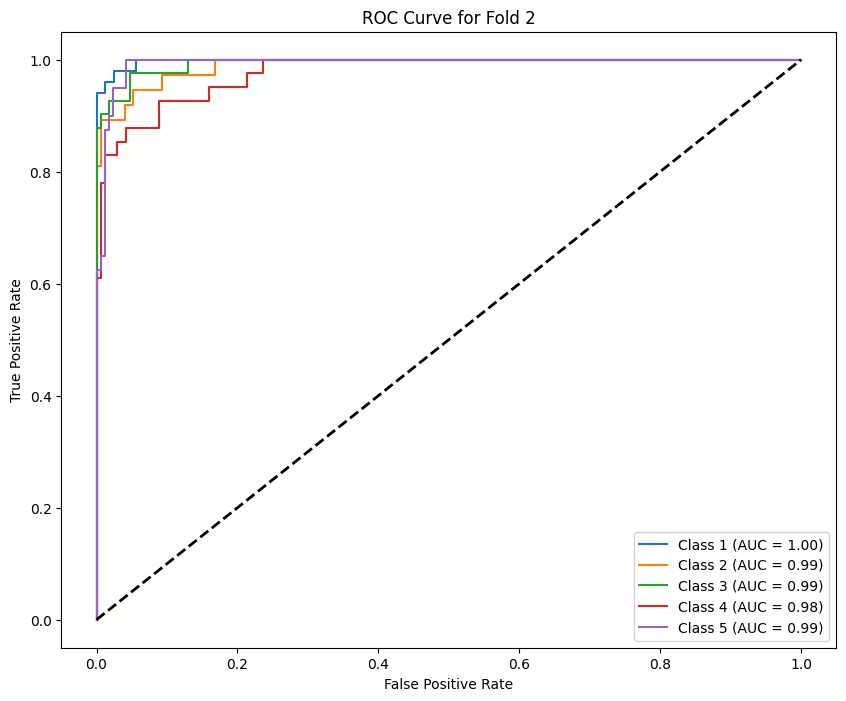

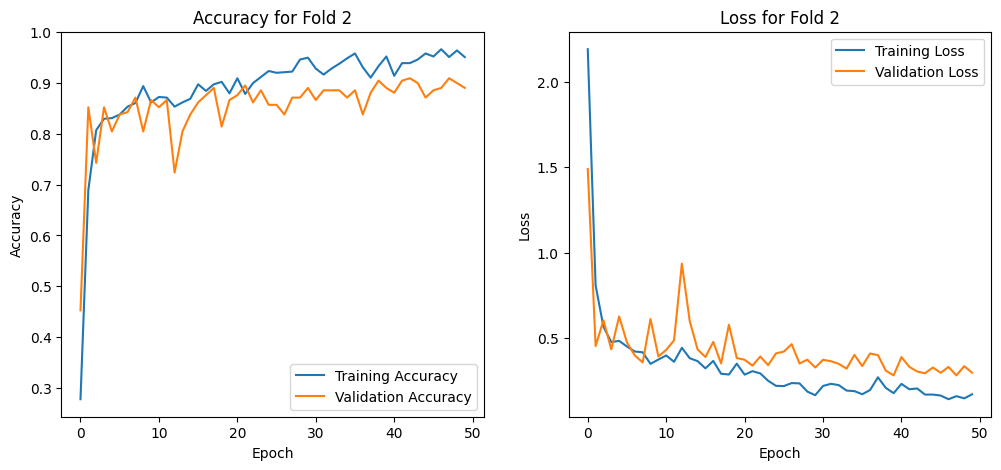

Training fold 3...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 2.67109, saving model to /tmp/deepconvnet_checkpoints/fold_3_best_weights.keras
53/53 - 14s - 266ms/step - accuracy: 0.3071 - loss: 2.3725 - val_accuracy: 0.2095 - val_loss: 2.6711
Epoch 2/50

Epoch 2: val_loss improved from 2.67109 to 0.56177, saving model to /tmp/deepconvnet_checkpoints/fold_3_best_weights.keras
53/53 - 1s - 13ms/step - accuracy: 0.6845 - loss: 0.9381 - val_accuracy: 0.8429 - val_loss: 0.5618
Epoch 3/50

Epoch 3: val_loss did not improve from 0.56177
53/53 - 1s - 20ms/step - accuracy: 0.7869 - loss: 0.6055 - val_accuracy: 0.8000 - val_loss: 0.6265
Epoch 4/50

Epoch 4: val_loss did not improve from 0.56177
53/53 - 1s - 11ms/step - accuracy: 0.8417 - loss: 0.4977 - val_accuracy: 0.7905 - val_loss: 0.5997
Epoch 5/50

Epoch 5: val_loss improved from 0.56177 to 0.54585, saving model to /tmp/deepconvnet_checkpoints/fold_3_best_weights.keras
53/53 - 1s - 14ms/step - accuracy: 0.8476 - loss: 0.4151 - val_accuracy: 0.8048 - val_loss: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.91      0.91      0.91        45
           2       0.84      0.95      0.89        38
           3       0.83      0.81      0.82        42
           4       0.90      0.82      0.86        44

    accuracy                           0.87       210
   macro avg       0.87      0.87      0.87       210
weighted avg       0.87      0.87      0.87       210



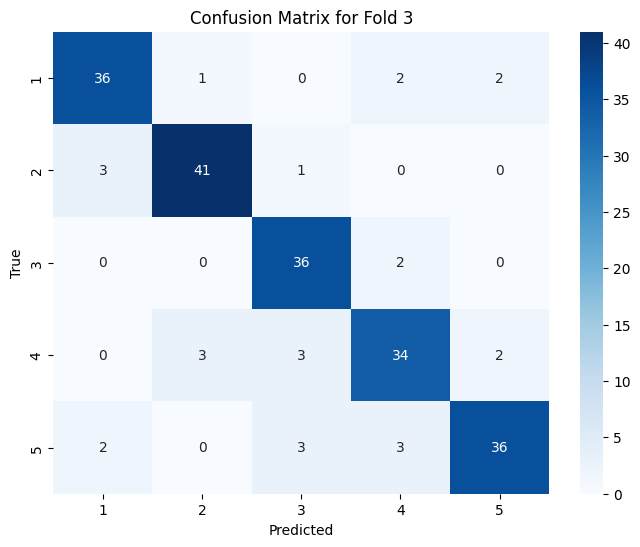

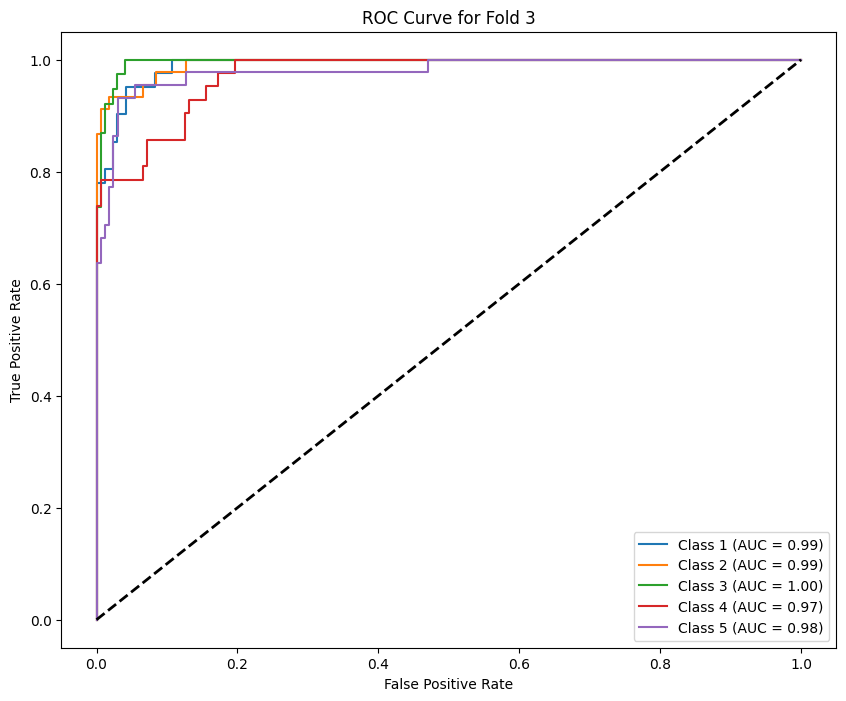

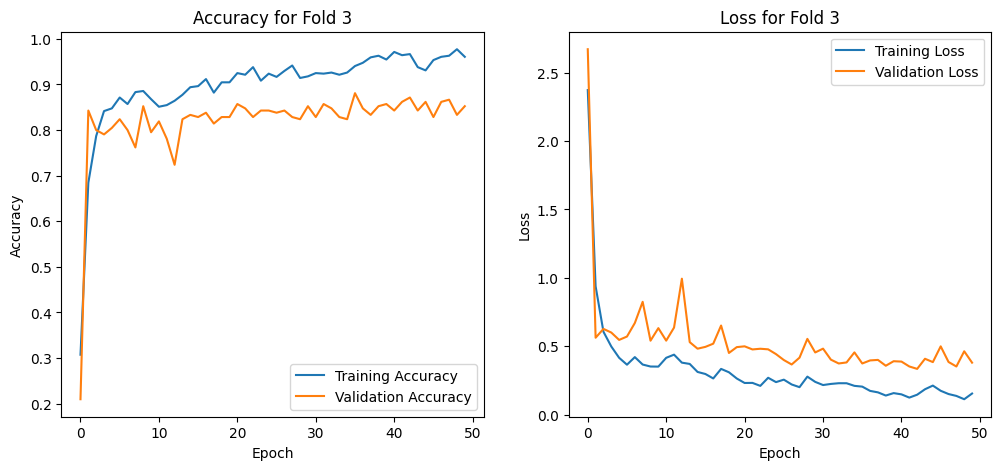

Training fold 4...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.73003, saving model to /tmp/deepconvnet_checkpoints/fold_4_best_weights.keras
53/53 - 14s - 264ms/step - accuracy: 0.2429 - loss: 3.0598 - val_accuracy: 0.2048 - val_loss: 1.7300
Epoch 2/50

Epoch 2: val_loss improved from 1.73003 to 0.85535, saving model to /tmp/deepconvnet_checkpoints/fold_4_best_weights.keras
53/53 - 1s - 12ms/step - accuracy: 0.6393 - loss: 1.0003 - val_accuracy: 0.6619 - val_loss: 0.8554
Epoch 3/50

Epoch 3: val_loss improved from 0.85535 to 0.58738, saving model to /tmp/deepconvnet_checkpoints/fold_4_best_weights.keras
53/53 - 1s - 21ms/step - accuracy: 0.8190 - loss: 0.5307 - val_accuracy: 0.8048 - val_loss: 0.5874
Epoch 4/50

Epoch 4: val_loss improved from 0.58738 to 0.57862, saving model to /tmp/deepconvnet_checkpoints/fold_4_best_weights.keras
53/53 - 1s - 16ms/step - accuracy: 0.8560 - loss: 0.4138 - val_accuracy: 0.7810 - val_loss: 0.5786
Epoch 5/50

Epoch 5: val_loss did not improve from 0.57862
53/53 - 1s - 13ms/

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Classification Report for Fold 4:

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.92      0.86      0.89        42
           2       0.77      0.84      0.80        44
           3       0.92      0.84      0.88        43
           4       0.84      0.88      0.86        41

    accuracy                           0.87       210
   macro avg       0.87      0.87      0.87       210
weighted avg       0.87      0.87      0.87       210



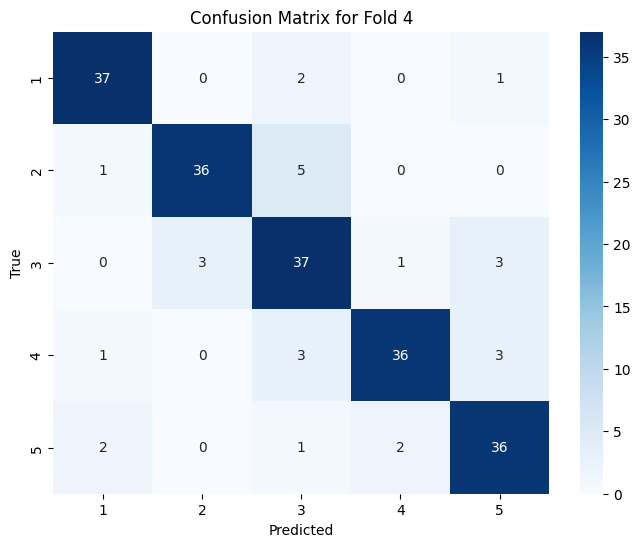

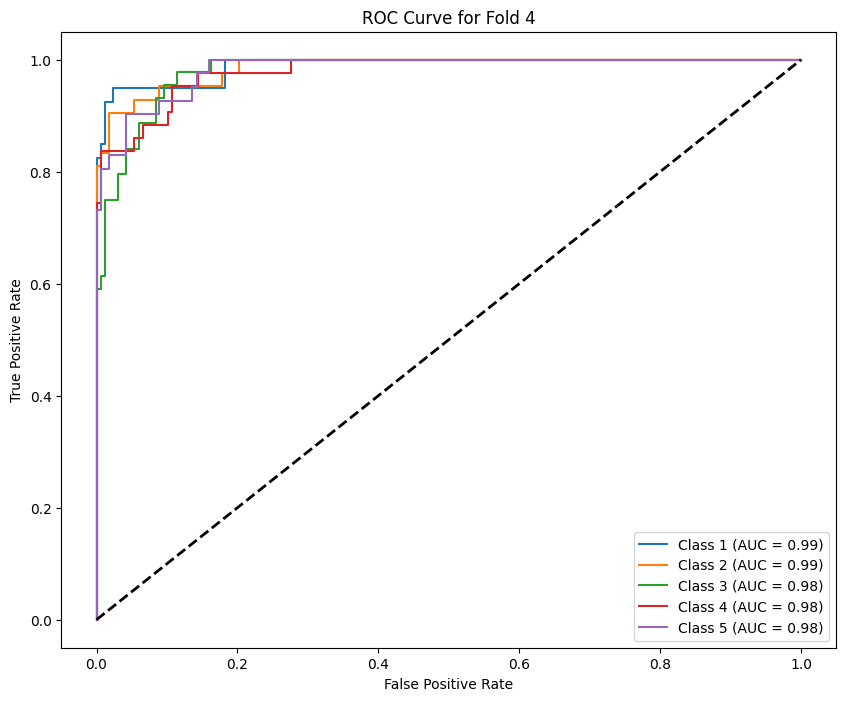

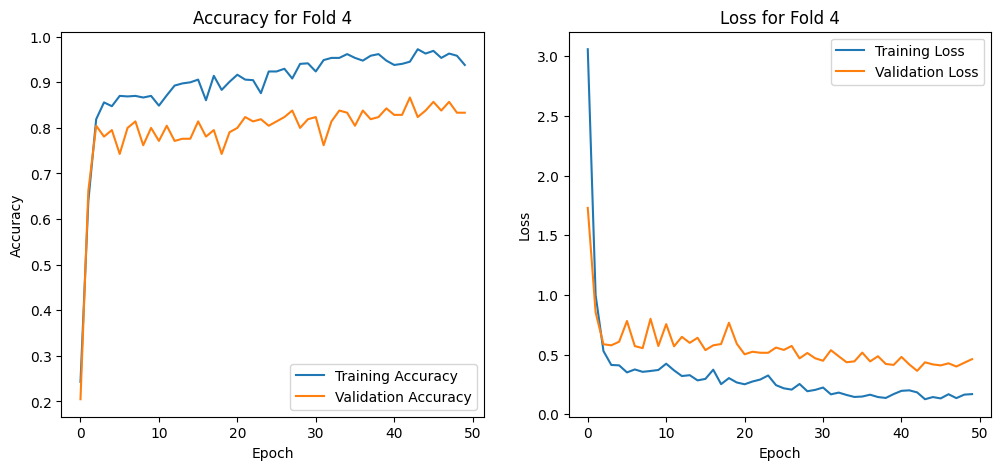

Training fold 5...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 2.33377, saving model to /tmp/deepconvnet_checkpoints/fold_5_best_weights.keras
53/53 - 14s - 261ms/step - accuracy: 0.3690 - loss: 1.8002 - val_accuracy: 0.2048 - val_loss: 2.3338
Epoch 2/50

Epoch 2: val_loss improved from 2.33377 to 0.52874, saving model to /tmp/deepconvnet_checkpoints/fold_5_best_weights.keras
53/53 - 1s - 11ms/step - accuracy: 0.7274 - loss: 0.7759 - val_accuracy: 0.8238 - val_loss: 0.5287
Epoch 3/50

Epoch 3: val_loss did not improve from 0.52874
53/53 - 0s - 8ms/step - accuracy: 0.8107 - loss: 0.5301 - val_accuracy: 0.7000 - val_loss: 0.7742
Epoch 4/50

Epoch 4: val_loss improved from 0.52874 to 0.42841, saving model to /tmp/deepconvnet_checkpoints/fold_5_best_weights.keras
53/53 - 1s - 16ms/step - accuracy: 0.7988 - loss: 0.5615 - val_accuracy: 0.8476 - val_loss: 0.4284
Epoch 5/50

Epoch 5: val_loss improved from 0.42841 to 0.40194, saving model to /tmp/deepconvnet_checkpoints/fold_5_best_weights.keras
53/53 - 0s - 9ms/st

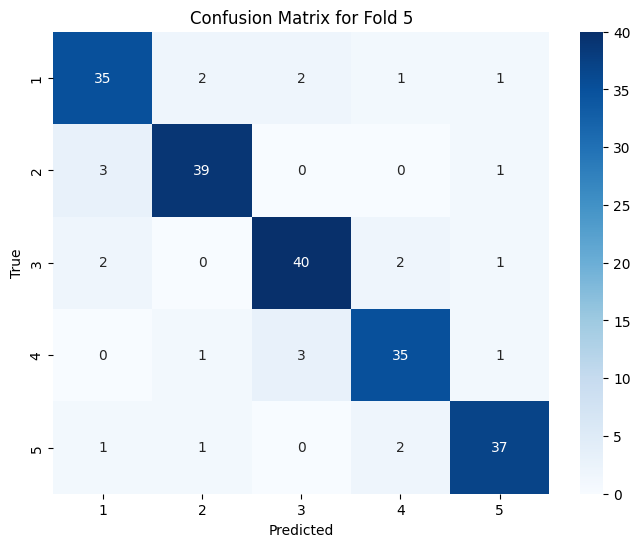

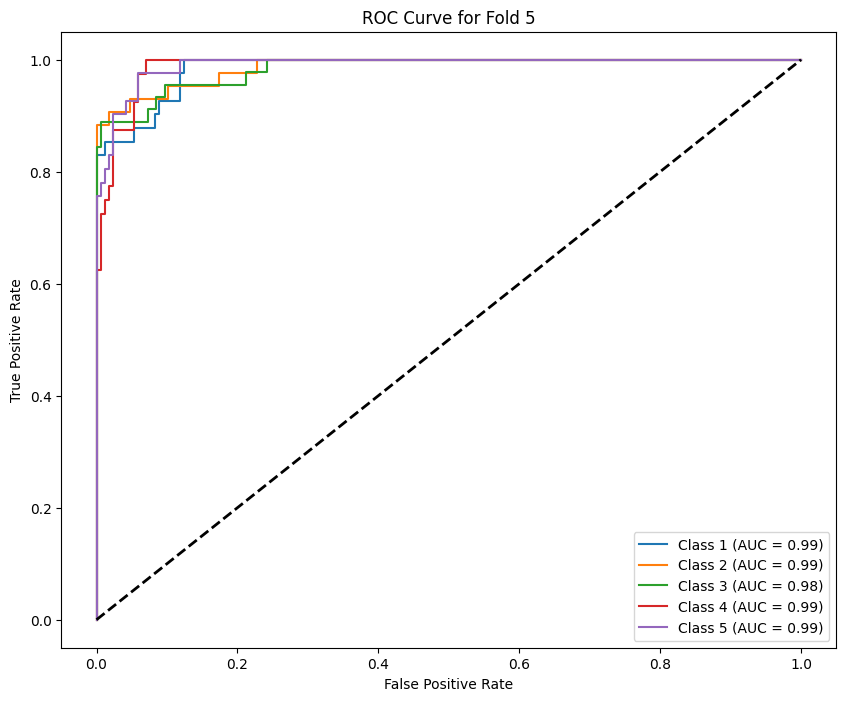

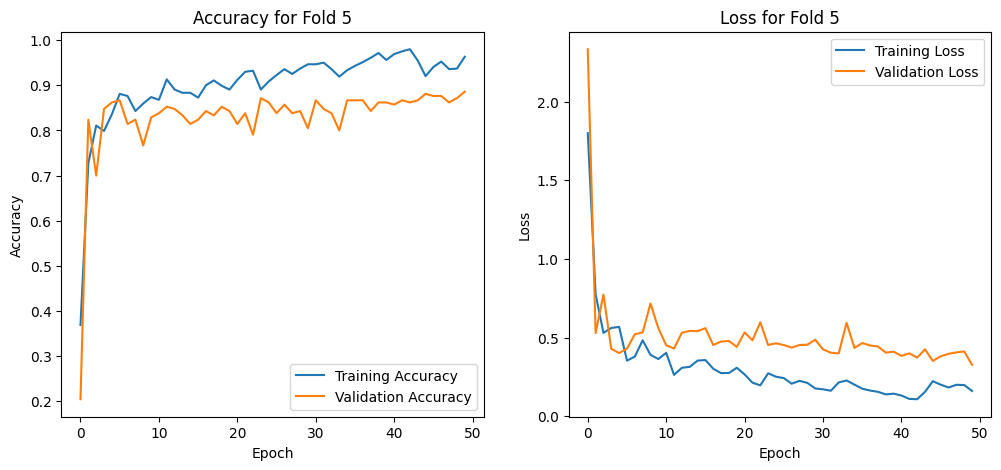

Overall Accuracy across folds: 0.8914 ± 0.0220
Overall Loss across folds: 0.3193 ± 0.0305


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Initialize data
X = epochs.get_data() * 1000  # Scale EEG data
y = labels

kernels, chans, samples = 1, 3, 1500  # Adjust to your data shape

# Convert labels to one-hot encoding
y_one_hot = to_categorical(y - 1)

# Add an extra dimension to the data (required for DeepConvNet)
X = X[:, :, :, np.newaxis]

# Parameters for k-fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_losses = []

# Create directory to store checkpoints
checkpoint_dir = '/tmp/deepconvnet_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

fold_no = 1
for train_index, val_index in kf.split(X):
    print(f"Training fold {fold_no}...")

    # Split data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_one_hot[train_index], y_one_hot[val_index]

    # Configure DeepConvNet model
    model = DeepConvNet(
        nb_classes=5,
        Chans=chans,
        Samples=samples,
        dropoutRate=0.5
    )

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Add a checkpointer to save the best weights for this fold
    checkpoint_path = os.path.join(checkpoint_dir, f"fold_{fold_no}_best_weights.keras")
    checkpointer = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=16,
        epochs=50,  # Adjust for quicker evaluation; change as needed
        verbose=2,
        validation_data=(X_val, y_val),
        callbacks=[checkpointer]
    )

    # Load the best weights before evaluation
    model.load_weights(checkpoint_path)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_accuracy)
    fold_losses.append(val_loss)
    print(f"Fold {fold_no} - Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

    # Predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    # Classification Report
    print(f"Classification Report for Fold {fold_no}:\n")
    print(classification_report(y_true_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 6), yticklabels=range(1, 6))
    plt.title(f"Confusion Matrix for Fold {fold_no}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve
    y_val_bin = label_binarize(y_true_classes, classes=range(5))
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(10, 8))
    for i in range(5):
        plt.plot(fpr[i], tpr[i], label=f"Class {i+1} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.title(f"ROC Curve for Fold {fold_no}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()

    # Training-Validation Accuracy and Loss Graphs
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy for Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss for Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    fold_no += 1

# Final summary of metrics across folds
print(f"Overall Accuracy across folds: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Overall Loss across folds: {np.mean(fold_losses):.4f} ± {np.std(fold_losses):.4f}")


# ShallowConvNet Training and Validation


Training fold 1...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 6.86697, saving model to /tmp/shallowconvnet_checkpoints/fold_1_best_weights.keras
53/53 - 8s - 146ms/step - accuracy: 0.1917 - loss: 4.0931 - val_accuracy: 0.1905 - val_loss: 6.8670
Epoch 2/50

Epoch 2: val_loss improved from 6.86697 to 2.18227, saving model to /tmp/shallowconvnet_checkpoints/fold_1_best_weights.keras
53/53 - 4s - 79ms/step - accuracy: 0.2810 - loss: 2.0122 - val_accuracy: 0.1810 - val_loss: 2.1823
Epoch 3/50

Epoch 3: val_loss improved from 2.18227 to 1.70453, saving model to /tmp/shallowconvnet_checkpoints/fold_1_best_weights.keras
53/53 - 0s - 7ms/step - accuracy: 0.3357 - loss: 1.7604 - val_accuracy: 0.2714 - val_loss: 1.7045
Epoch 4/50

Epoch 4: val_loss improved from 1.70453 to 1.64808, saving model to /tmp/shallowconvnet_checkpoints/fold_1_best_weights.keras
53/53 - 1s - 11ms/step - accuracy: 0.3738 - loss: 1.6747 - val_accuracy: 0.3619 - val_loss: 1.6481
Epoch 5/50

Epoch 5: val_loss improved from 1.64808 to 1.58464, sav

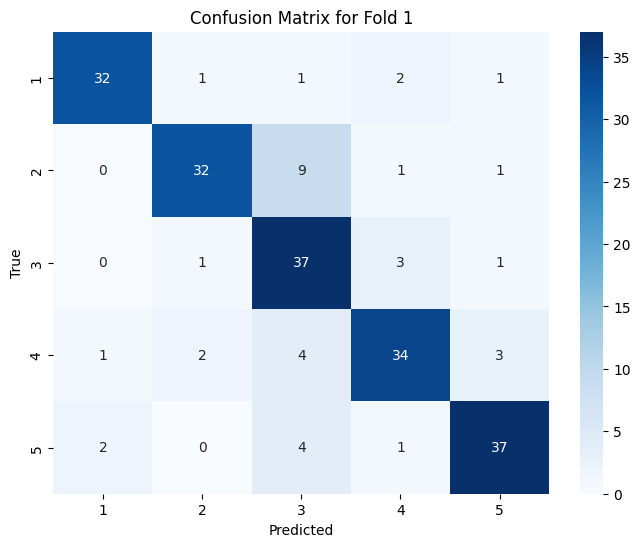

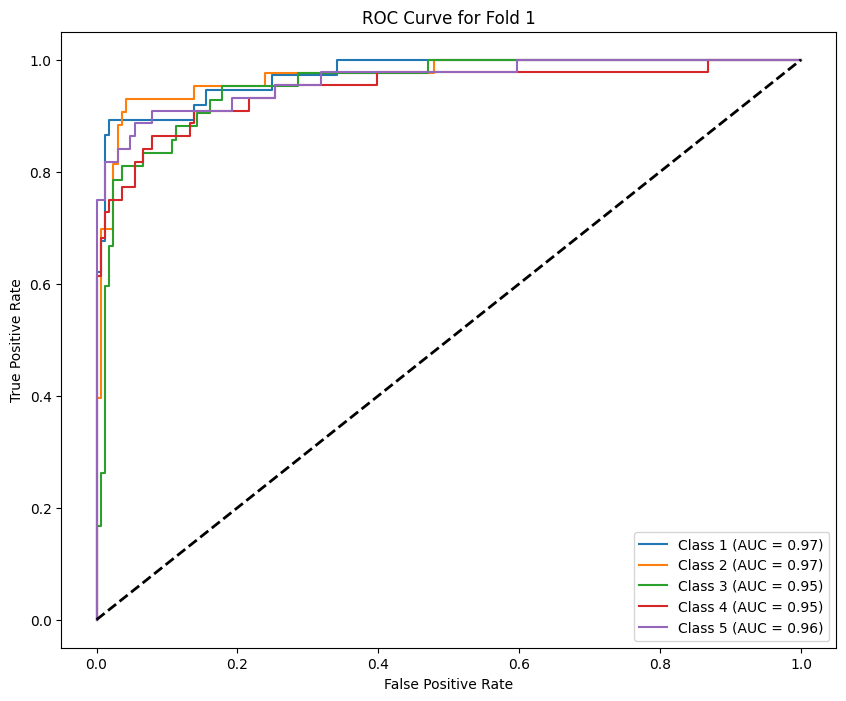

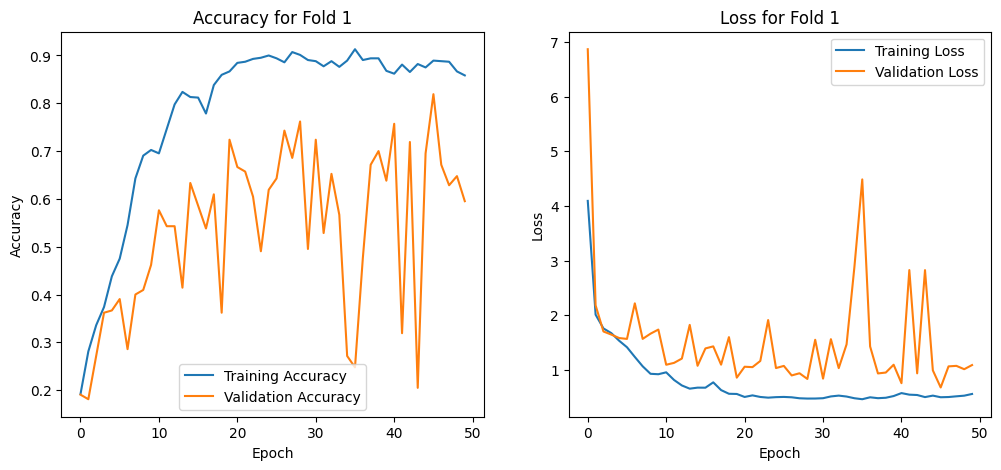

Training fold 2...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 4.65574, saving model to /tmp/shallowconvnet_checkpoints/fold_2_best_weights.keras
53/53 - 5s - 85ms/step - accuracy: 0.2143 - loss: 3.8002 - val_accuracy: 0.1762 - val_loss: 4.6557
Epoch 2/50

Epoch 2: val_loss improved from 4.65574 to 2.07731, saving model to /tmp/shallowconvnet_checkpoints/fold_2_best_weights.keras
53/53 - 0s - 7ms/step - accuracy: 0.2464 - loss: 1.9088 - val_accuracy: 0.2143 - val_loss: 2.0773
Epoch 3/50

Epoch 3: val_loss did not improve from 2.07731
53/53 - 1s - 10ms/step - accuracy: 0.2702 - loss: 2.0422 - val_accuracy: 0.1952 - val_loss: 2.1784
Epoch 4/50

Epoch 4: val_loss improved from 2.07731 to 1.61310, saving model to /tmp/shallowconvnet_checkpoints/fold_2_best_weights.keras
53/53 - 0s - 6ms/step - accuracy: 0.3536 - loss: 1.8274 - val_accuracy: 0.3476 - val_loss: 1.6131
Epoch 5/50

Epoch 5: val_loss improved from 1.61310 to 1.53865, saving model to /tmp/shallowconvnet_checkpoints/fold_2_best_weights.keras
53/53 - 0s

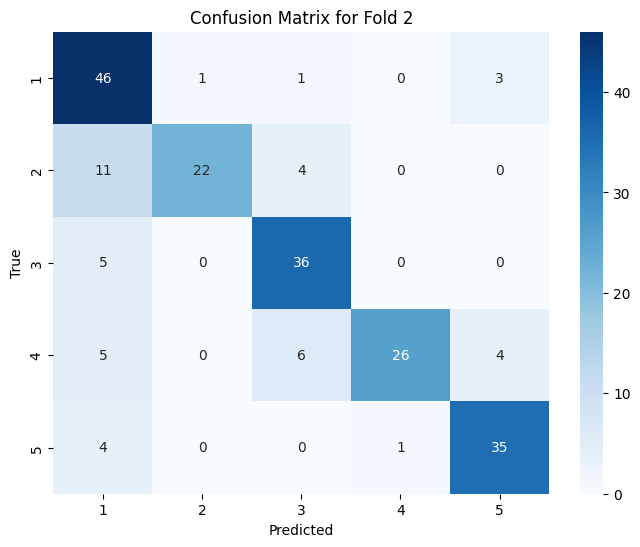

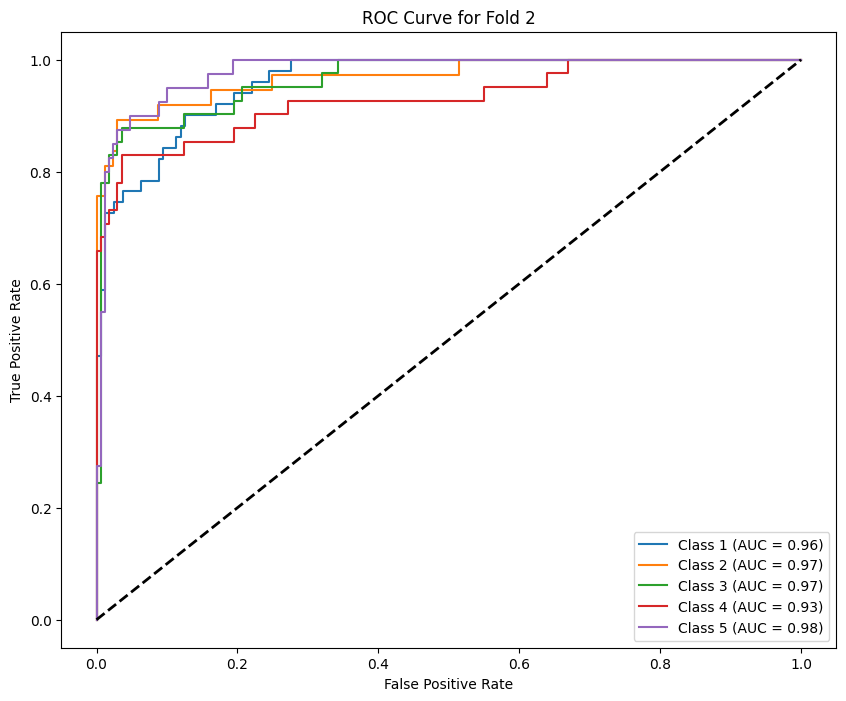

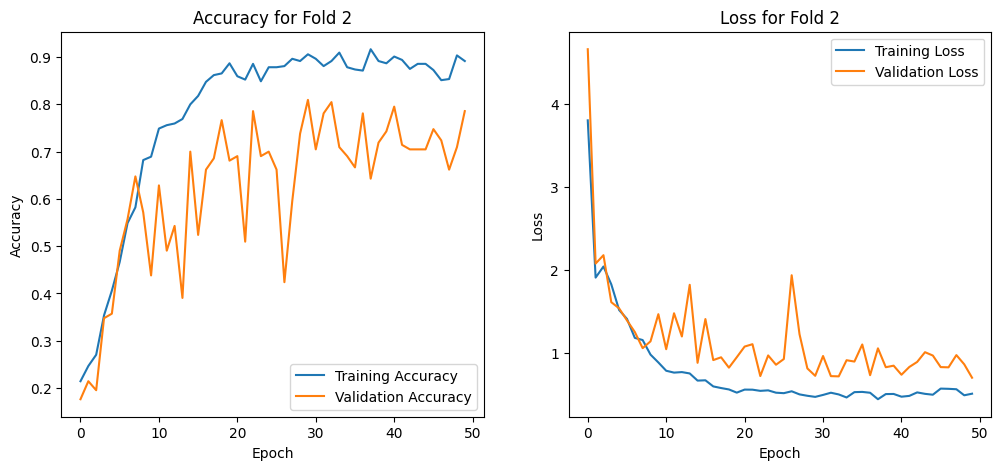

Training fold 3...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 4.46338, saving model to /tmp/shallowconvnet_checkpoints/fold_3_best_weights.keras
53/53 - 5s - 102ms/step - accuracy: 0.1929 - loss: 5.1651 - val_accuracy: 0.1810 - val_loss: 4.4634
Epoch 2/50

Epoch 2: val_loss improved from 4.46338 to 1.77442, saving model to /tmp/shallowconvnet_checkpoints/fold_3_best_weights.keras
53/53 - 0s - 9ms/step - accuracy: 0.2536 - loss: 2.0967 - val_accuracy: 0.2333 - val_loss: 1.7744
Epoch 3/50

Epoch 3: val_loss did not improve from 1.77442
53/53 - 0s - 5ms/step - accuracy: 0.2905 - loss: 1.8924 - val_accuracy: 0.2190 - val_loss: 1.8733
Epoch 4/50

Epoch 4: val_loss did not improve from 1.77442
53/53 - 0s - 5ms/step - accuracy: 0.3536 - loss: 1.7648 - val_accuracy: 0.1810 - val_loss: 2.2357
Epoch 5/50

Epoch 5: val_loss improved from 1.77442 to 1.32089, saving model to /tmp/shallowconvnet_checkpoints/fold_3_best_weights.keras
53/53 - 0s - 5ms/step - accuracy: 0.4131 - loss: 1.5321 - val_accuracy: 0.4238 - val_loss

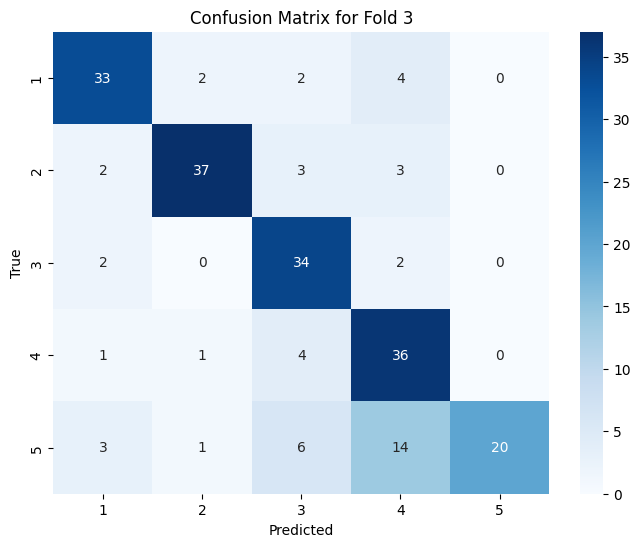

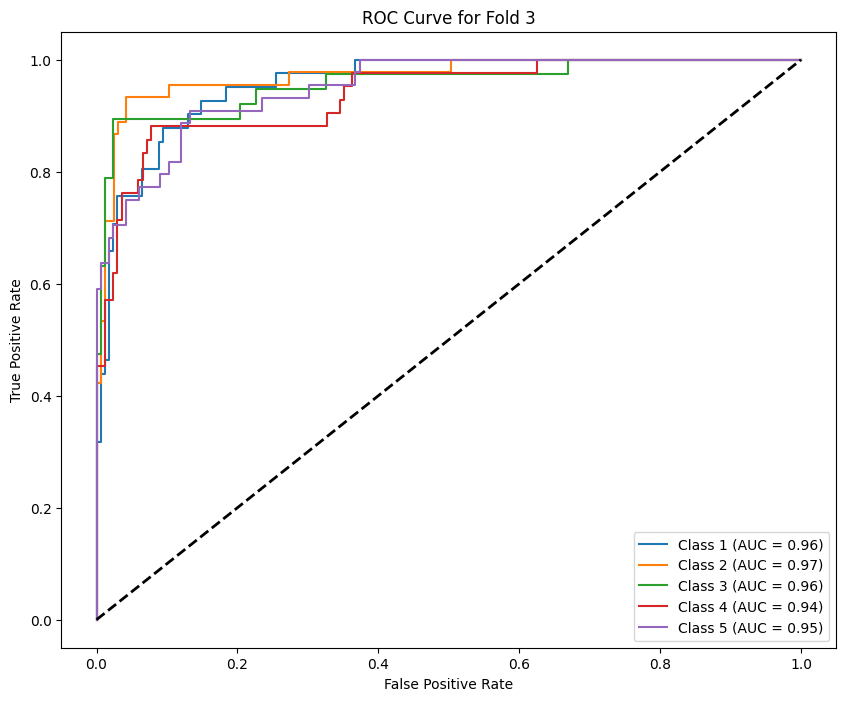

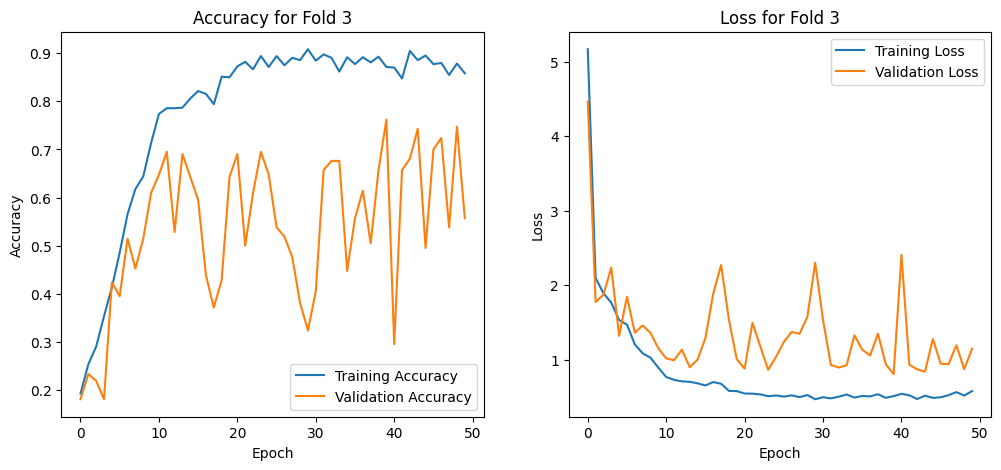

Training fold 4...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 7.85013, saving model to /tmp/shallowconvnet_checkpoints/fold_4_best_weights.keras
53/53 - 7s - 124ms/step - accuracy: 0.1917 - loss: 3.9888 - val_accuracy: 0.2048 - val_loss: 7.8501
Epoch 2/50

Epoch 2: val_loss improved from 7.85013 to 2.23074, saving model to /tmp/shallowconvnet_checkpoints/fold_4_best_weights.keras
53/53 - 1s - 11ms/step - accuracy: 0.2655 - loss: 2.0457 - val_accuracy: 0.2143 - val_loss: 2.2307
Epoch 3/50

Epoch 3: val_loss improved from 2.23074 to 1.77359, saving model to /tmp/shallowconvnet_checkpoints/fold_4_best_weights.keras
53/53 - 1s - 10ms/step - accuracy: 0.3190 - loss: 1.8395 - val_accuracy: 0.2476 - val_loss: 1.7736
Epoch 4/50

Epoch 4: val_loss improved from 1.77359 to 1.71020, saving model to /tmp/shallowconvnet_checkpoints/fold_4_best_weights.keras
53/53 - 1s - 12ms/step - accuracy: 0.3631 - loss: 1.8040 - val_accuracy: 0.2571 - val_loss: 1.7102
Epoch 5/50

Epoch 5: val_loss improved from 1.71020 to 1.27208, sa

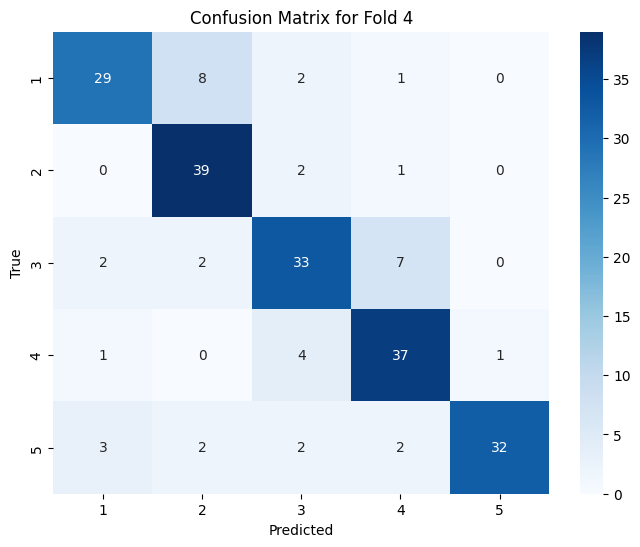

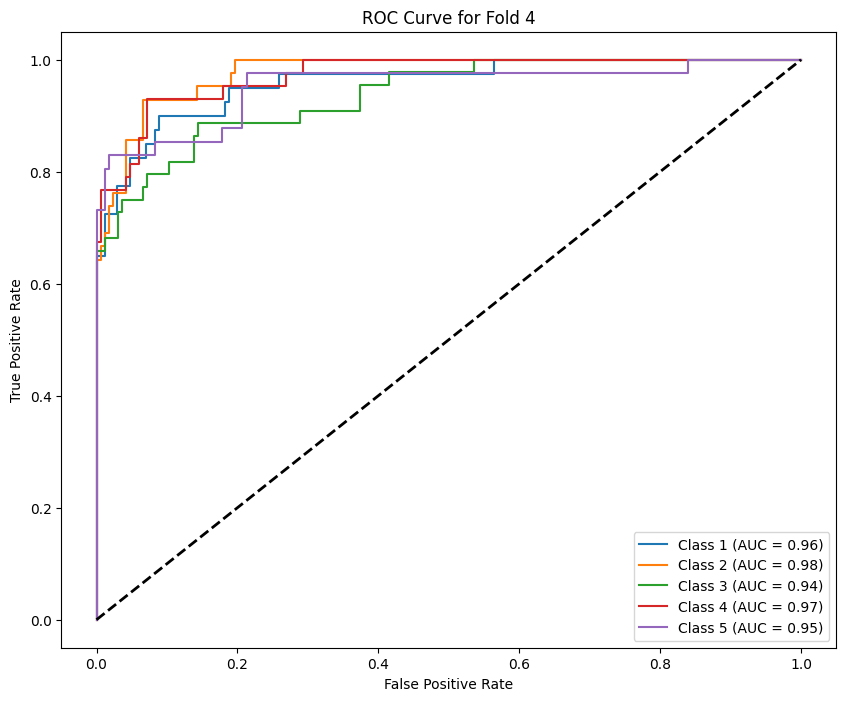

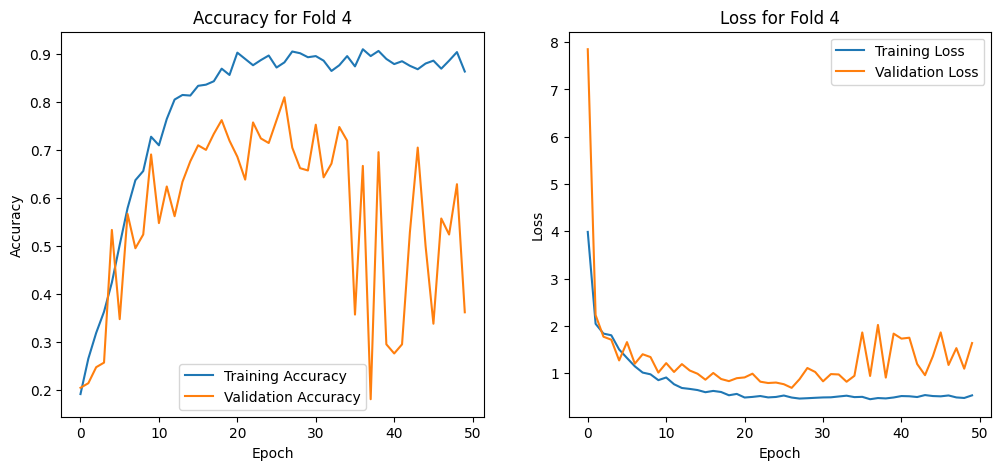

Training fold 5...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 3.49467, saving model to /tmp/shallowconvnet_checkpoints/fold_5_best_weights.keras
53/53 - 6s - 121ms/step - accuracy: 0.1786 - loss: 3.8831 - val_accuracy: 0.1905 - val_loss: 3.4947
Epoch 2/50

Epoch 2: val_loss improved from 3.49467 to 1.64408, saving model to /tmp/shallowconvnet_checkpoints/fold_5_best_weights.keras
53/53 - 0s - 7ms/step - accuracy: 0.2667 - loss: 1.8214 - val_accuracy: 0.2762 - val_loss: 1.6441
Epoch 3/50

Epoch 3: val_loss improved from 1.64408 to 1.49937, saving model to /tmp/shallowconvnet_checkpoints/fold_5_best_weights.keras
53/53 - 0s - 6ms/step - accuracy: 0.3060 - loss: 1.7466 - val_accuracy: 0.3619 - val_loss: 1.4994
Epoch 4/50

Epoch 4: val_loss improved from 1.49937 to 1.39754, saving model to /tmp/shallowconvnet_checkpoints/fold_5_best_weights.keras
53/53 - 1s - 11ms/step - accuracy: 0.3536 - loss: 1.5929 - val_accuracy: 0.4857 - val_loss: 1.3975
Epoch 5/50

Epoch 5: val_loss did not improve from 1.39754
53/53 - 1

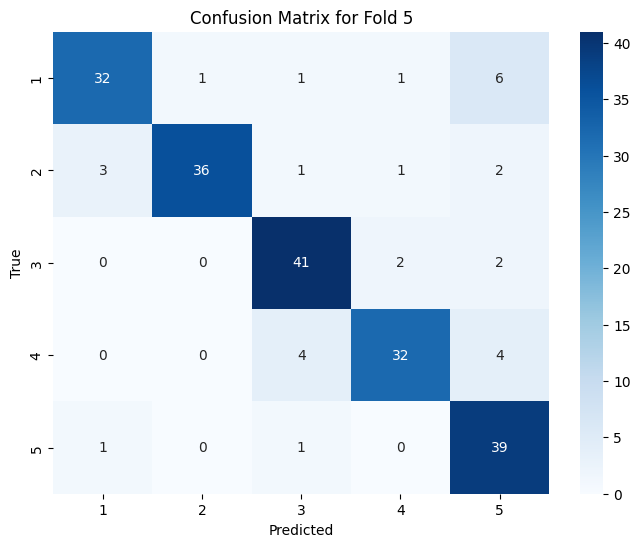

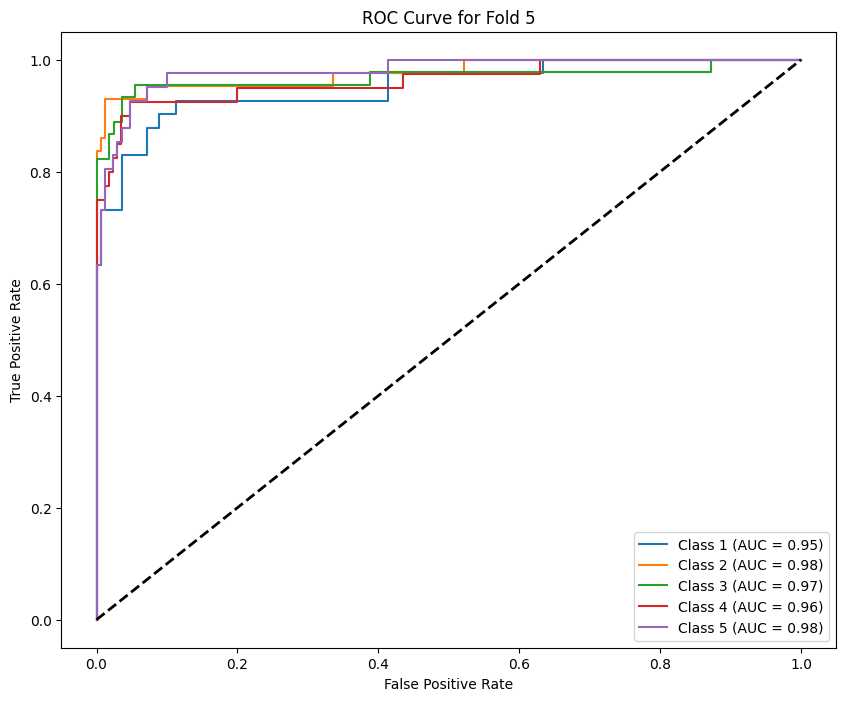

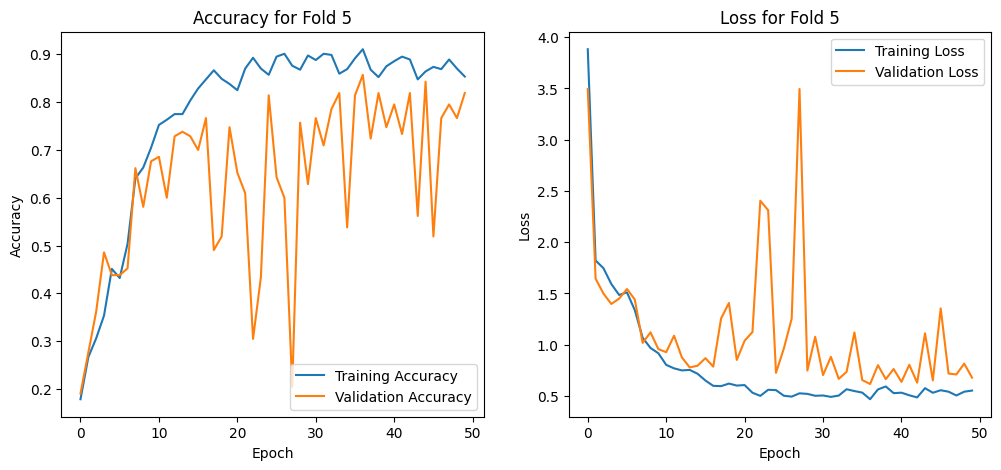

Overall Accuracy across folds: 0.8067 ± 0.0321
Overall Loss across folds: 0.7000 ± 0.0610


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Initialize data
X = epochs.get_data() * 1000  # Scale EEG data
y = labels

kernels, chans, samples = 1, 3, 1500  # Adjust to your data shape

# Convert labels to one-hot encoding
y_one_hot = to_categorical(y - 1)

# Add an extra dimension to the data (required for ShallowConvNet)
X = X[:, :, :, np.newaxis]

# Parameters for k-fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_losses = []

# Create directory to store checkpoints
checkpoint_dir = '/tmp/shallowconvnet_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

fold_no = 1
for train_index, val_index in kf.split(X):
    print(f"Training fold {fold_no}...")

    # Split data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_one_hot[train_index], y_one_hot[val_index]

    # Configure ShallowConvNet model
    model = ShallowConvNet(
        nb_classes=5,
        Chans=chans,
        Samples=samples,
        dropoutRate=0.5
    )

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Add a checkpointer to save the best weights for this fold
    checkpoint_path = os.path.join(checkpoint_dir, f"fold_{fold_no}_best_weights.keras")
    checkpointer = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=16,
        epochs=50,  # Adjust for quicker evaluation; change as needed
        verbose=2,
        validation_data=(X_val, y_val),
        callbacks=[checkpointer]
    )

    # Load the best weights before evaluation
    model.load_weights(checkpoint_path)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_accuracy)
    fold_losses.append(val_loss)
    print(f"Fold {fold_no} - Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

    # Predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    # Classification Report
    print(f"Classification Report for Fold {fold_no}:\n")
    print(classification_report(y_true_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 6), yticklabels=range(1, 6))
    plt.title(f"Confusion Matrix for Fold {fold_no}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve
    y_val_bin = label_binarize(y_true_classes, classes=range(5))
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(10, 8))
    for i in range(5):
        plt.plot(fpr[i], tpr[i], label=f"Class {i+1} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.title(f"ROC Curve for Fold {fold_no}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()

    # Training-Validation Accuracy and Loss Graphs
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy for Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss for Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    fold_no += 1

# Final summary of metrics across folds
print(f"Overall Accuracy across folds: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Overall Loss across folds: {np.mean(fold_losses):.4f} ± {np.std(fold_losses):.4f}")
